In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

%matplotlib inline

In [5]:
df = pd.read_csv('houseprices.csv')


In [6]:
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
print("Some Statistics of the Housing Price:\n")
print(df['SalePrice'].describe())
print("\nThe median of the Housing Price is: ", df['SalePrice'].median(axis = 0))

Some Statistics of the Housing Price:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The median of the Housing Price is:  163000.0


<AxesSubplot:xlabel='SalePrice'>

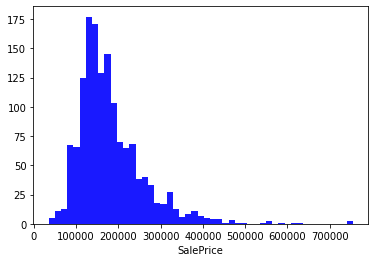

In [8]:
sns.distplot(df['SalePrice'], kde = False, color = 'b', hist_kws={'alpha': 0.9})


<AxesSubplot:>

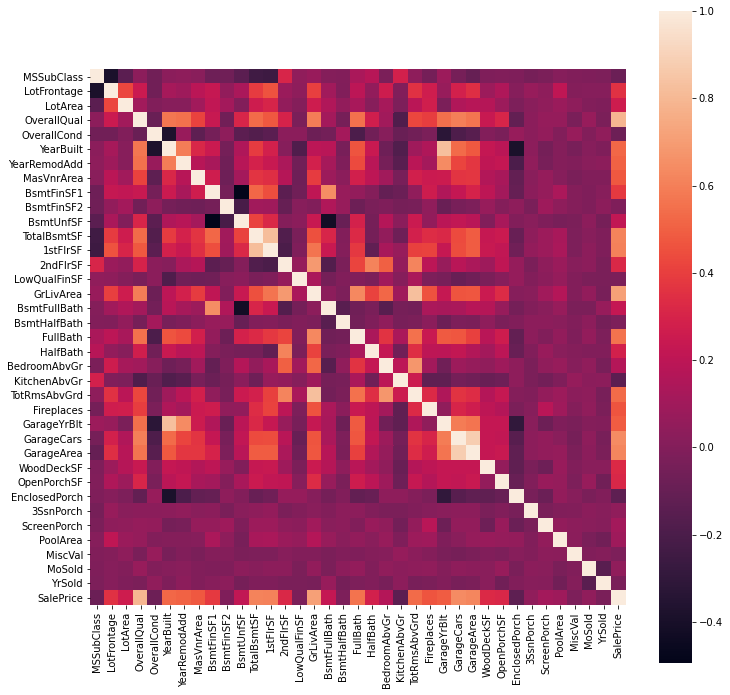

In [9]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [11]:
print(corr['SalePrice'])
cor_dict = corr['SalePrice'].to_dict()
print(cor_dict)
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64
{'MSSu

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

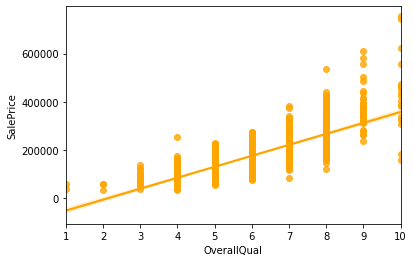

In [12]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = df, color = 'Orange')


<Figure size 432x288 with 0 Axes>

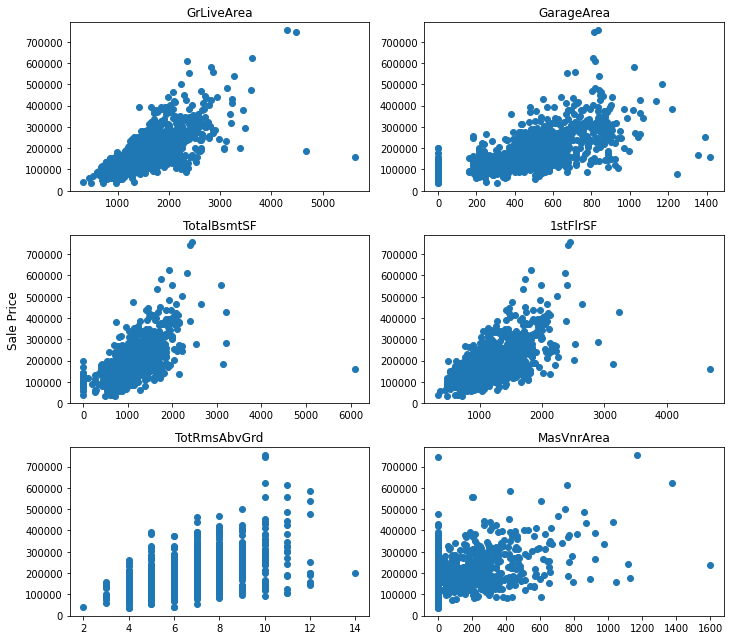

In [13]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = df.SalePrice.values
axarr[0, 0].scatter(df.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(df.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(df.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(df['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(df.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(df.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

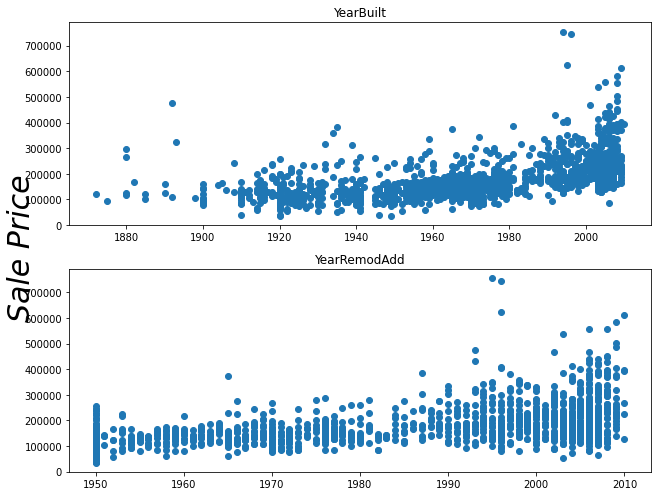

In [25]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
plt.scatter(df.YearBuilt.values, price)
plt.title('YearBuilt')

plt.subplot(212)
plt.scatter(df.YearRemodAdd.values, price)
plt.title('YearRemodAdd')

fig.text(-0.01, 0.5, 'Sale Price', va = 'center', style = 'italic', fontsize = 30,rotation = 'vertical' )

plt.tight_layout()

In [26]:
print(df.select_dtypes(include=['object']).columns.values)


['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


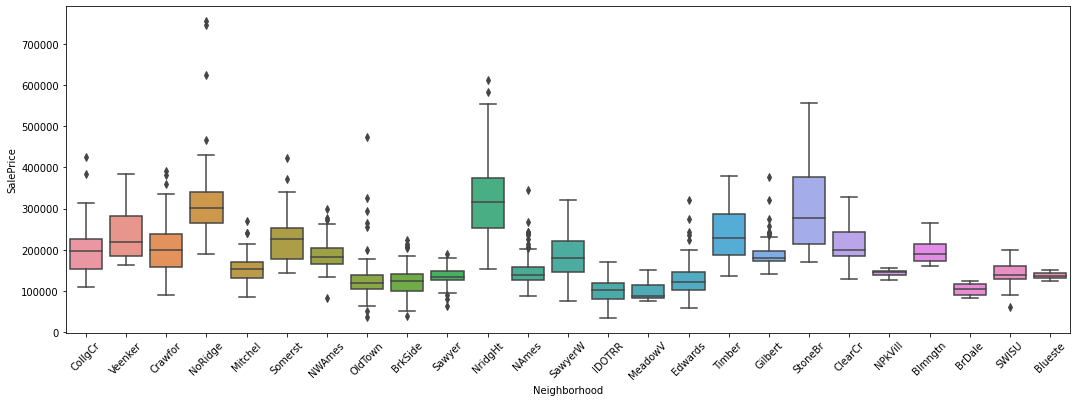

In [28]:
plt.figure(figsize = (18, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

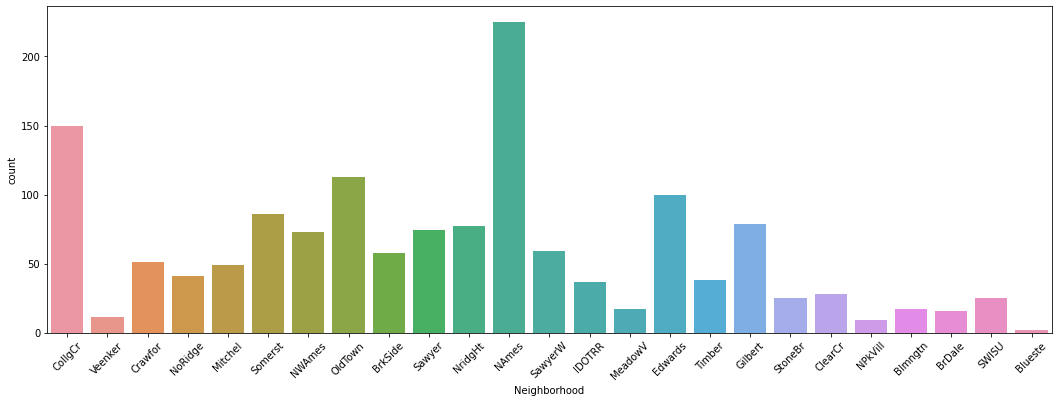

In [29]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'Neighborhood', data = df)
xt = plt.xticks(rotation=45)

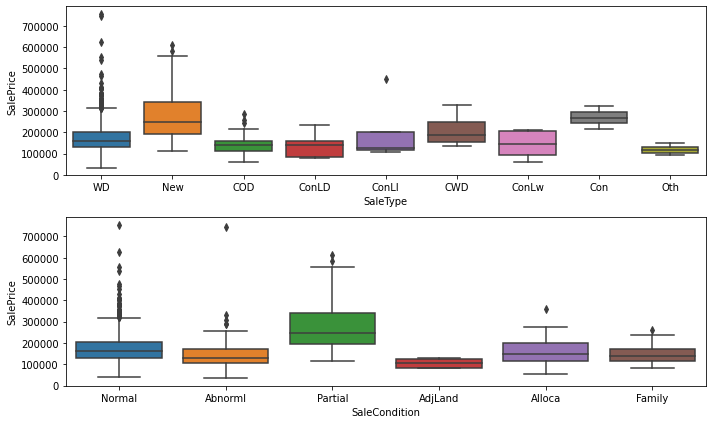

In [30]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df, ax = ax[1])
plt.tight_layout()

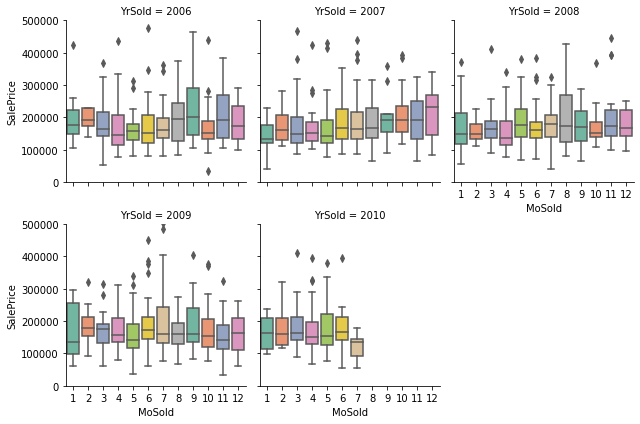

In [31]:
g = sns.FacetGrid(df, col = 'YrSold', col_wrap = 3)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13))\
.set(ylim = (0, 500000))
plt.tight_layout()

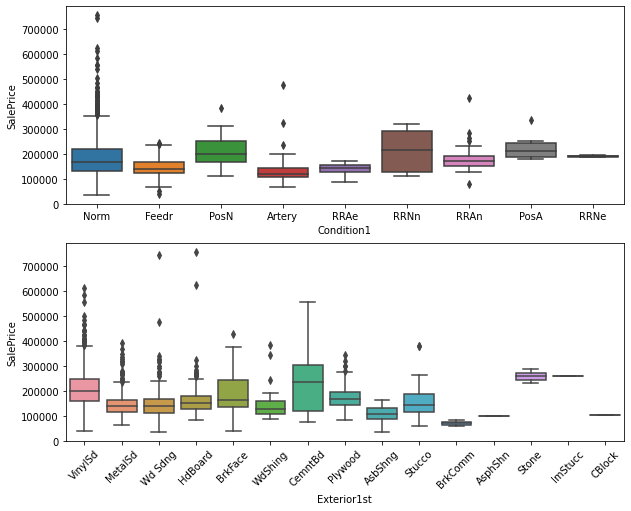

In [32]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

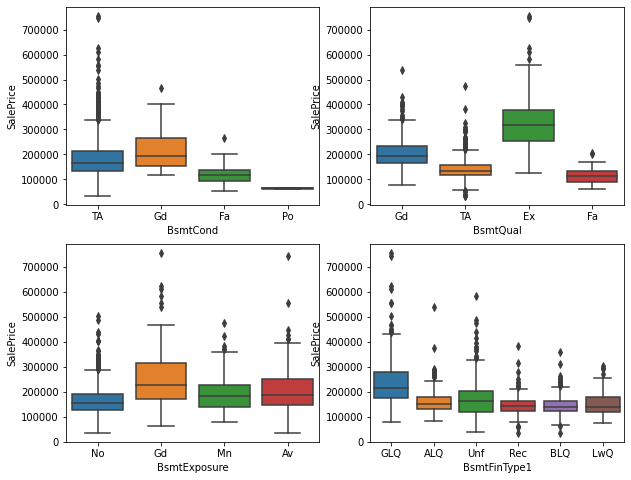

In [33]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = df, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = df, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = df, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = df, ax = ax[1, 1])

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

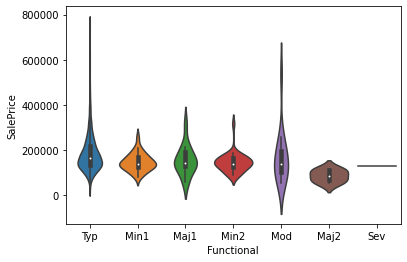

In [34]:
sns.violinplot('Functional', 'SalePrice', data = df)


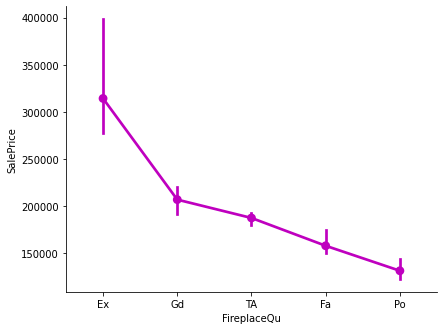

In [35]:
sns.factorplot('FireplaceQu', 'SalePrice', data = df, color = 'm', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

In [36]:
pd.crosstab(df.Fireplaces, df.FireplaceQu)


FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


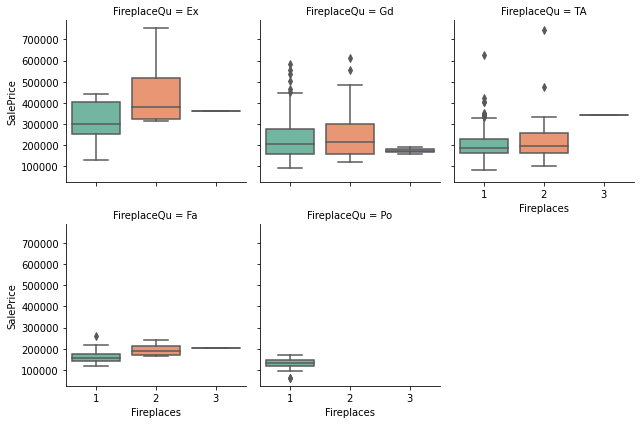

In [37]:
g = sns.FacetGrid(df, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')

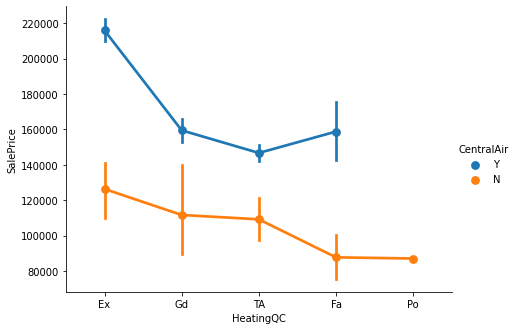

In [38]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = df, 
             size = 4.5, aspect = 1.4)

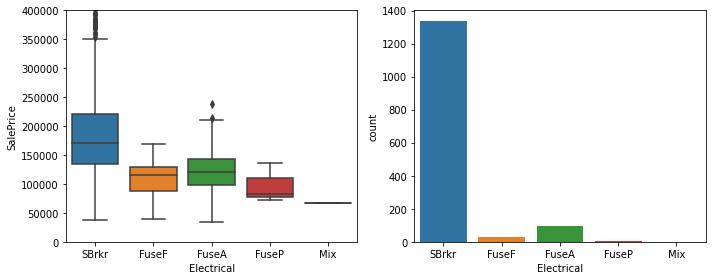

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot('Electrical', 'SalePrice', data = df, ax = ax[0]).set(ylim = (0, 400000))
sns.countplot('Electrical', data = df)
plt.tight_layout()

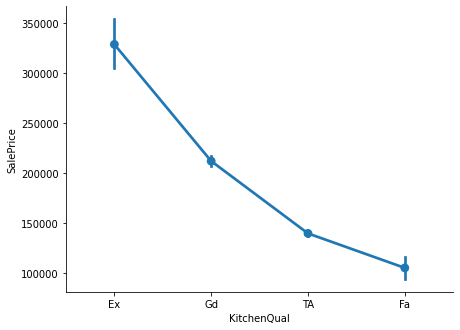

In [40]:
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = df, order = ['Ex', 'Gd', 'TA', 'Fa'])

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

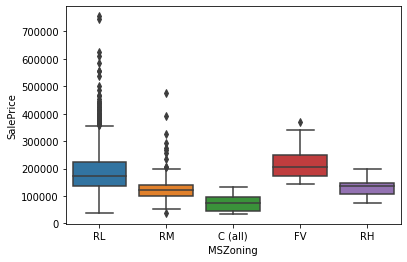

In [41]:
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df)


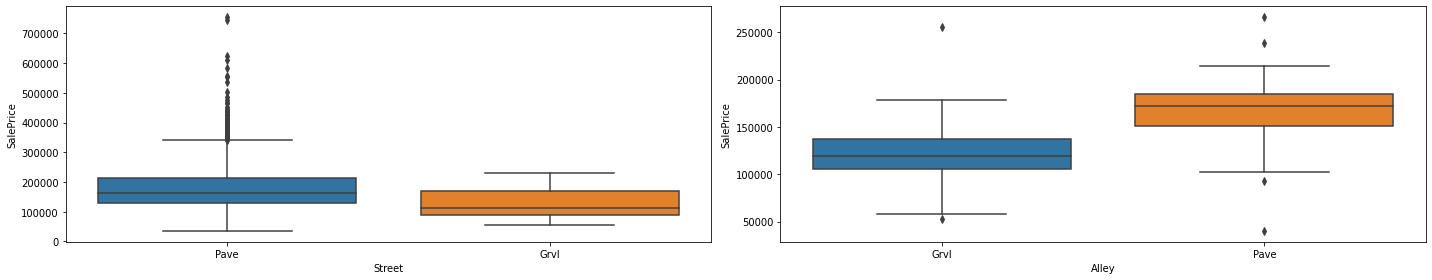

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = df, ax = ax[1])
plt.tight_layout()

In [44]:
print("The NA's in Alley is: ", df['Alley'].isnull().sum())
print("\nThere are so many NA's in Alley. When Alley is NA, Street = ", 
      df[df.Alley.notnull()].Street.unique())
print("\n", pd.crosstab(df.Street, df.Alley))

The NA's in Alley is:  1369

There are so many NA's in Alley. When Alley is NA, Street =  ['Pave']

 Alley   Grvl  Pave
Street            
Pave      50    41
